
Explained variance ratio of components:
[0.72962445 0.22850762]

PCA Transformed Data (first 5 rows):
        PC1       PC2 Species
0 -2.264703  0.480027  Setosa
1 -2.080961 -0.674134  Setosa
2 -2.364229 -0.341908  Setosa
3 -2.299384 -0.597395  Setosa
4 -2.389842  0.646835  Setosa


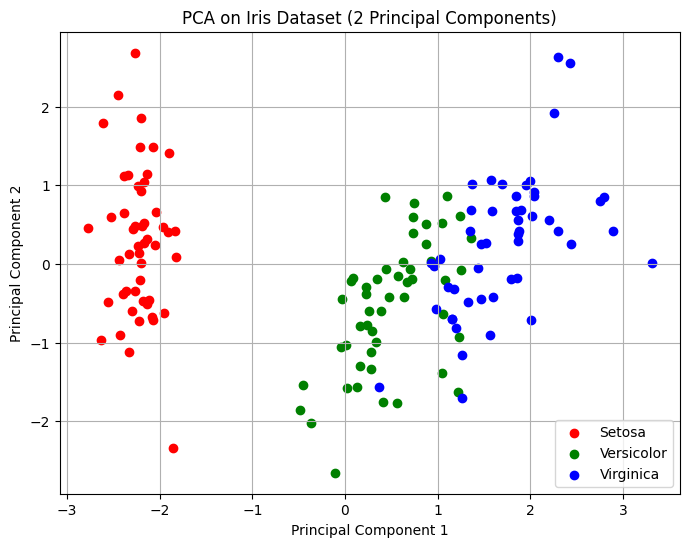

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="Species")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y.map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print("\nExplained variance ratio of components:")
print(pca.explained_variance_ratio_)
print("\nPCA Transformed Data (first 5 rows):")
print(pca_df.head())


plt.figure(figsize=(8,6))
for species, color in zip(['Setosa', 'Versicolor', 'Virginica'], ['red', 'green', 'blue']):
    subset = pca_df[pca_df['Species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species, color=color)

plt.title("PCA on Iris Dataset (2 Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()
